In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import keras

In [2]:
train = pd.read_csv("train.csv")

In [3]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
y = train.label.values.astype('int32')
x = train[train.columns[1:]].values.astype('float32')

In [5]:
X_train , X_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 100)


In [6]:
X_train = X_train.reshape( -1 , 28 , 28 , 1)
X_test = X_test.reshape( -1 , 28 , 28 , 1)

In [7]:
np.shape(X_train)

(33600, 28, 28, 1)

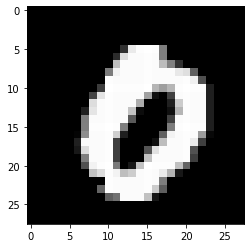

In [8]:
plt.imshow(X_train[0].reshape(28,28) , cmap = 'gray')

In [9]:
X_train = X_train / 255
X_test = X_test / 255

In [10]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [13]:
def build_model(hp):  
    model = keras.Sequential([
    keras.layers.Conv2D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
        activation='relu',
        input_shape=(28,28,1)
    ),
    keras.layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        activation='relu'
    ),
    keras.layers.Flatten(),
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
        activation='relu'
    ),
    keras.layers.Dense(10, activation='softmax')
  ])
  
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
  
    return model

In [14]:
from kerastuner.tuners import RandomSearch

tuner_search=RandomSearch(build_model,
                          objective='val_accuracy',
                          max_trials=3,directory='output',project_name="Mnist Digit6")

In [13]:
model=tuner_search.get_best_models(num_models=1)[0]

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import RMSprop

In [11]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', padding='same',input_shape=(28 , 28 , 1)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(10, activation='softmax'))  

In [12]:
model.compile(optimizer = 'Adam',loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
model.fit(X_train , y_train , epochs = 8)

Epoch 1/8
1050/1050 [==============================] - 45s 42ms/step - loss: 0.0342 - accuracy: 0.9896
Epoch 2/8
1050/1050 [==============================] - 43s 41ms/step - loss: 0.0265 - accuracy: 0.9917
Epoch 3/8
1050/1050 [==============================] - 44s 42ms/step - loss: 0.0177 - accuracy: 0.9944
Epoch 4/8
1050/1050 [==============================] - 43s 41ms/step - loss: 0.0133 - accuracy: 0.9954
Epoch 5/8
1050/1050 [==============================] - 44s 41ms/step - loss: 0.0078 - accuracy: 0.9979
Epoch 6/8
1050/1050 [==============================] - 43s 41ms/step - loss: 0.0092 - accuracy: 0.9971
Epoch 7/8
1050/1050 [==============================] - 44s 42ms/step - loss: 0.0093 - accuracy: 0.9973
Epoch 8/8
1050/1050 [==============================] - 48s 46ms/step - loss: 0.0045 - accuracy: 0.9986


In [15]:
model.evaluate(X_test , y_test)

263/263 [==============================] - 4s 12ms/step - loss: 0.0784 - accuracy: 0.9833


[0.07844877988100052, 0.9833333492279053]

In [16]:
ans = model.predict_classes(X_test)

C:\Users\User-1\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Prediction is :  5


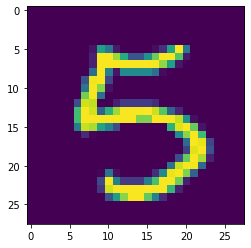

In [17]:
plt.imshow(X_test[8].reshape(28 , 28))
print('Prediction is : ' , ans[8])

## DATA AUGMENTATION


In [34]:
from keras.preprocessing.image import ImageDataGenerator , img_to_array , load_img

datagen = ImageDataGenerator(
    featurewise_center=True,
    featurewise_std_normalization=True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True)

img = load_img("C:\\Users\\User-1\\Desktop\\a\\DSC_0451.jpg")
x = img_to_array(img)
x = x.reshape((1,) + x.shape)

i = 0
for batch in datagen.flow(x , batch_size = 1 , save_to_dir = 'C:\\Users\\User-1\\Desktop\\a' , save_format = 'jpg'):
    i = i + 1
    if i > 5:
        break